# Part 1

In this part we load all necessary libraries and load dataset

### Installation

In [ ]:
!pip install pyspellchecker
!apt update !apt install enchant --fix-missing
!pip install googletrans
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.3 MB/s eta 0:00:00
E: The update command takes no arguments
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=e952424aac98006e5b55f1dacf4b2cd932f15a17e293df03f86ce1f687757520
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successful

### Importing

In [ ]:
import nltk
import os
import json
import gzip
import pandas as pd
import numpy as np
import nltk
import string
#import enchant
from urllib.request import urlopen
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from ftfy import fix_text
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from googletrans import Translator
from nltk.corpus import wordnet as wordnet
import time
import warnings; warnings.filterwarnings("ignore")

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
translator = Translator()
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
!ls

### Dataset Importing

In [ ]:
# Import the dataset

from google.colab import files

file = files.upload()

json = gzip.open('AMAZON_FASHION_5.json.gz')

In [ ]:
import json
import gzip

def read_json_lines(filename):
    with gzip.open(filename, 'rt', encoding='utf-8') as file:
        for line in file:
            yield json.loads(line.strip())

# Using a generator expression to create a list of dictionaries
data = list(read_json_lines('AMAZON_FASHION_5.json.gz'))


In [ ]:
data = []

with gzip.open('AMAZON_FASHION_5.json.gz', 'rb') as f:
    for line in f:
        # You should use json.loads on the line, not on the GzipFile object
        data.append(json.loads(line.strip()))

# Total length of the list, which equals the total number of products
print(len(data))

# First row of the list (metadata of the first product)
print(data[0])


3176
{'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015', 'reviewerID': 'ALJ66O1Y6SLHA', 'asin': 'B000K2PJ4K', 'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}, 'reviewerName': 'Tonya B.', 'reviewText': 'Great product and price!', 'summary': 'Five Stars', 'unixReviewTime': 1441324800}


In [ ]:
# Convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

3176


# Part 2

In this part we preprocess our dataset

In [ ]:
df = df[['overall', 'reviewerID', 'asin', 'reviewText', 'summary']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

In [ ]:
df.head(10)

,overall,reviewerID,asin,reviewText,summary
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars
5,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small. Will use for futur children!,Oops!
6,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Great
7,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Good
8,5.0,A3W11493KS6Z2L,B000K2PJ4K,My son really likes the pink. Ones which I was...,Great
9,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small. Will use for future child.,Oops!
10,2.0,A3HX4X3TIABWOV,B000KPIHQ4,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist
11,2.0,AW8UBYMNJ894V,B000KPIHQ4,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.
12,5.0,A265UZVOZWTTXQ,B000KPIHQ4,We have used these inserts for years. They pr...,Great inserts
13,5.0,AW8UBYMNJ894V,B000KPIHQ4,Pinnacle seems to have more cushioning so my h...,Personal favorite


### Sentence separation

In [ ]:
sentences_df = pd.DataFrame(columns=['overall', 'reviewerID', 'asin', 'sentence', 'summary'])

# Iterate through each row in the original DataFrame
for index, row in df.iterrows():
    # Tokenize the review text into sentences
    sentences = nltk.sent_tokenize(row['reviewText'])

    # Create a DataFrame for the sentences of the current row
    row_df = pd.DataFrame({'overall': [row['overall']] * len(sentences), 'reviewerID': [row['reviewerID']] * len(sentences), 'asin': [row['asin']] * len(sentences), 'sentence': sentences, 'summary': [row['summary']] * len(sentences)})

    # Append the row DataFrame to the sentences DataFrame
    sentences_df = sentences_df.append(row_df, ignore_index=True)

# Display the resulting DataFrame
sentences_df

,overall,reviewerID,asin,sentence,summary
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars
1,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small.,Oops!
2,3.0,A3W11493KS6Z2L,B000K2PJ4K,Will use for futur children!,Oops!
3,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Great
4,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Good
...,...,...,...,...,...
7739,5.0,A311XHHLM12MUT,B005AGO4LU,These move effortlessly with the bend of my foot.,Love them!
7740,5.0,A311XHHLM12MUT,B005AGO4LU,I've worn these for multiple activities and I'...,Love them!
7741,5.0,A311XHHLM12MUT,B005AGO4LU,The white/green/dark grey color goes with so m...,Love them!
7742,5.0,A311XHHLM12MUT,B005AGO4LU,Highly recommend!,Love them!


In [ ]:
empty_sentences_records = sentences_df[sentences_df['sentence'].apply(lambda x: len(x) == 0)]
len(empty_sentences_records)

0

### Defining preprocessing functions

In [ ]:
def removePunctuation(str):
  str = fix_text(str)
  str = str.translate(str.maketrans('','',string.punctuation))
  if not str:
    str = " "
  return str

In [ ]:
def basic_data_preprocessor(text):
  #split words
  tokens = word_tokenize(text)
  #lowercase
  tokens = [w.lower() for w in tokens]
  #remove punctuation
  tokens_clean = str.maketrans('','',string.punctuation)
  tokens_cleaned = [w.translate(tokens_clean) for w in tokens]
  #reomve remaining tokens that are not alphabetic
  clean_words = [word for word in tokens_cleaned if word.isalpha()]
  #filter stopwords
  final_review = " ".join(clean_words)
  ##
  return final_review

In [ ]:
def advanced_data_preprocessor(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    new_stopwords = set(stopwords.words('english')) - {'no', 'nor', 'not'}
    words = [word for word in tokens if not word in new_stopwords]

    # Spell correction using Levenshtein distance
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)

    # Lemmatizing the words using nltk lemmatizer
    lemmatized_words = [lemmatizer.lemmatize(word) for word in corrected_words]

    return " ".join(lemmatized_words)

### Dataset Preprocessing

In [ ]:
review_text = []
review_title = []

In [ ]:
# start_time = time.time()
# for rownum, row in df.iterrows():
#   data_processed = basic_data_preprocessor(row['reviewText'])
#   data_processed = advanced_data_preprocessor(data_processed)
#   review_text.append(data_processed)
#   title_processed = basic_data_preprocessor(row['summary'])
#   title_processed = advanced_data_preprocessor(title_processed)
#   review_title.append(title_processed)
#   if (rownum % 1000 == 0):
#     print("processed %d reviews" % (rownum +1))
# print("-- %.2f seconds --" %(time.time() - start_time))

In [ ]:
import time
from multiprocessing import Pool

if __name__ == "__main__":
    start_time = time.time()

    with Pool() as pool:
        # Process review text
        review_text = pool.map(basic_data_preprocessor, df["reviewText"])
        review_text = pool.map(advanced_data_preprocessor, review_text)

        # Process review title
        review_title = pool.map(basic_data_preprocessor, df["summary"])
        review_title = pool.map(advanced_data_preprocessor, review_title)

    print("--- %.2f seconds* " % (time.time() - start_time))

--- 151.09 seconds* 


In [ ]:
df['Review Title'] = review_title
df['Review Text'] = review_text
df.head(10)

,overall,reviewerID,asin,reviewText,summary,Review Title,Review Text
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,five star,great product price
5,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small. Will use for futur children!,Oops!,oops,way small use futur child
6,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Great,great,stay vibrant many wash
7,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Good,good,stay vibrant many wash
8,5.0,A3W11493KS6Z2L,B000K2PJ4K,My son really likes the pink. Ones which I was...,Great,great,son really like pink one nervous
9,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small. Will use for future child.,Oops!,oops,way small use future child
10,2.0,A3HX4X3TIABWOV,B000KPIHQ4,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,recommended podiatrist,relieved plantar fasciitis day unbearable pain...
11,2.0,AW8UBYMNJ894V,B000KPIHQ4,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,not pair,pair best thing ever plantar fasciitis resulta...
12,5.0,A265UZVOZWTTXQ,B000KPIHQ4,We have used these inserts for years. They pr...,Great inserts,great insert,used insert year provide great support
13,5.0,AW8UBYMNJ894V,B000KPIHQ4,Pinnacle seems to have more cushioning so my h...,Personal favorite,personal favorite,pinnacle seems cushioning husband like better ...


In [ ]:
df = df[['overall', 'reviewerID', 'asin', 'Review Title', 'Review Text']]

In [ ]:
df

,overall,reviewerID,asin,Review Title,Review Text
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price
5,3.0,A3W11493KS6Z2L,B000K2PJ4K,oops,way small use futur child
6,5.0,A3W11493KS6Z2L,B000K2PJ4K,great,stay vibrant many wash
7,5.0,A3W11493KS6Z2L,B000K2PJ4K,good,stay vibrant many wash
8,5.0,A3W11493KS6Z2L,B000K2PJ4K,great,son really like pink one nervous
...,...,...,...,...,...
3171,5.0,A2077NII5H62R2,B005AGO4LU,five star,perfect fit
3172,5.0,A2IBS6PIPAGAB5,B005AGO4LU,comfortable,favorite cross trainer
3173,5.0,A1GTC5EVSJNCQ8,B005AGO4LU,five star,love fit perfect
3174,5.0,A311XHHLM12MUT,B005AGO4LU,love,favorite nike shoe ever flex sole excellent so...


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('Processed_Fashion_Reviews.csv', index=False)

### Sentences Preprocessing

In [ ]:
review_text_sentence = []
review_title_sentence = []

In [ ]:
# start_time = time.time()
# for rownum, row in sentences_df.iterrows():
#   data_processed = basic_data_preprocessor(row['sentence'])
#   data_processed = advanced_data_preprocessor(data_processed)
#   review_text_sentence.append(data_processed)
#   title_processed = basic_data_preprocessor(row['summary'])
#   title_processed = advanced_data_preprocessor(title_processed)
#   review_title_sentence.append(title_processed)
#   if (rownum % 1000 == 0):
#     print("processed %d reviews" % (rownum +1))
# print("-- %.2f seconds --" %(time.time() - start_time))

In [ ]:
if __name__ == "__main__":
    start_time = time.time()

    with Pool() as pool:
        # Process review text
        review_text_sentence = pool.map(basic_data_preprocessor, sentences_df["sentence"])
        review_text_sentence = pool.map(advanced_data_preprocessor, review_text_sentence)

        # Process review title
        review_title_sentence = pool.map(basic_data_preprocessor, sentences_df["summary"])
        review_title_sentence = pool.map(advanced_data_preprocessor, review_title_sentence)

    print("--- %.2f seconds* " % (time.time() - start_time))

--- 183.57 seconds* 


In [ ]:
sentences_df['Review Title'] = review_title_sentence
sentences_df['Review Text Sentence'] = review_text_sentence

In [ ]:
sentences_df

,overall,reviewerID,asin,sentence,summary,Review Title,Review Text Sentence
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,five star,great product price
1,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small.,Oops!,oops,way small
2,3.0,A3W11493KS6Z2L,B000K2PJ4K,Will use for futur children!,Oops!,oops,use futur child
3,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Great,great,stay vibrant many wash
4,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,Good,good,stay vibrant many wash
...,...,...,...,...,...,...,...
7739,5.0,A311XHHLM12MUT,B005AGO4LU,These move effortlessly with the bend of my foot.,Love them!,love,move effortlessly bend foot
7740,5.0,A311XHHLM12MUT,B005AGO4LU,I've worn these for multiple activities and I'...,Love them!,love,worn multiple activity no foot ankle pain
7741,5.0,A311XHHLM12MUT,B005AGO4LU,The white/green/dark grey color goes with so m...,Love them!,love,grey color go many outfit mesh breathes perfec...
7742,5.0,A311XHHLM12MUT,B005AGO4LU,Highly recommend!,Love them!,love,highly recommend


In [ ]:
sentences_df = sentences_df[['overall', 'reviewerID', 'asin', 'sentence', 'Review Title', 'Review Text Sentence']]

In [ ]:
sentences_df

,overall,reviewerID,asin,sentence,Review Title,Review Text Sentence
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,five star,great product price
1,3.0,A3W11493KS6Z2L,B000K2PJ4K,Waaay too small.,oops,way small
2,3.0,A3W11493KS6Z2L,B000K2PJ4K,Will use for futur children!,oops,use futur child
3,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,great,stay vibrant many wash
4,5.0,A3W11493KS6Z2L,B000K2PJ4K,Stays vibrant after many washes,good,stay vibrant many wash
...,...,...,...,...,...,...
7739,5.0,A311XHHLM12MUT,B005AGO4LU,These move effortlessly with the bend of my foot.,love,move effortlessly bend foot
7740,5.0,A311XHHLM12MUT,B005AGO4LU,I've worn these for multiple activities and I'...,love,worn multiple activity no foot ankle pain
7741,5.0,A311XHHLM12MUT,B005AGO4LU,The white/green/dark grey color goes with so m...,love,grey color go many outfit mesh breathes perfec...
7742,5.0,A311XHHLM12MUT,B005AGO4LU,Highly recommend!,love,highly recommend


In [ ]:
blank_sentences = sentences_df[sentences_df['Review Text Sentence'].str.strip() == '']
blank_sentence_count = len(blank_sentences)
blank_sentence_count

220

In [ ]:
sentences_df = sentences_df[sentences_df['Review Text Sentence'].str.strip() != '']

In [ ]:
len(sentences_df)

7524

In [ ]:
blank_sentences = sentences_df[sentences_df['Review Text Sentence'].str.strip() == '']
blank_sentence_count = len(blank_sentences)
blank_sentence_count

0

# Part 3

In this part we apply supervised learning techniques like BERT and LSTM

BERT

In [ ]:
df["Sentiment"] = df["overall"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})
df['short_review'] =df['Review Text'].str.decode("utf-8")
df = df[["Review Text", "Sentiment"]]
df = df.dropna()
df.isna().sum()

Review Text    0
Sentiment      0
dtype: int64

In [ ]:
# !pip install tensorflow
# !pip install transformers
# !pip install scikit-learn
# !pip install tqdm

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Binary classification, so num_labels=2


train_encodings = tokenizer(train_df['Review Text'].tolist(), truncation=True, padding=True, return_tensors='tf')
train_labels = tf.convert_to_tensor(train_df['Sentiment'].tolist())


test_encodings = tokenizer(test_df['Review Text'].tolist(), truncation=True, padding=True, return_tensors='tf')
test_labels = tf.convert_to_tensor(test_df['Sentiment'].tolist())


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss_fn, metrics=[metric])

train_encodings = {key: val.numpy() for key, val in train_encodings.items()}
test_encodings = {key: val.numpy() for key, val in test_encodings.items()}


history = model.fit(train_encodings, train_labels, epochs=2, batch_size=16)

test_loss, test_accuracy = model.evaluate(test_encodings, test_labels)
print(f"Test Accuracy: {test_accuracy}")


predictions = model.predict(test_encodings)
predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()

accuracy = accuracy_score(test_labels.numpy(), predicted_labels)
print(f"Accuracy: {accuracy}")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
154/154 [==============================] - 3422s 22s/step - loss: 0.2166 - accuracy: 0.9324
Epoch 2/2
20/20 [==============================] - 254s 12s/step - loss: 0.0168 - accuracy: 0.9967
Test Accuracy: 0.9967479705810547
20/20 [==============================] - 252s 12s/step
Accuracy: 0.9967479674796748


LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
df['Review Text']=df['Review Tex'].astype(str)

In [ ]:
df

,Review Text,Sentiment
0,great product price,1
5,way small use futur child,1
6,stay vibrant many wash,1
7,stay vibrant many wash,1
8,son really like pink one nervous,1
...,...,...
3171,perfect fit,1
3172,favorite cross trainer,1
3173,love fit perfect,1
3174,favorite nike shoe ever flex sole excellent so...,1


In [ ]:
# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Split the data into training and testing sets
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# # Tokenize the text data
# max_words = 10000  # You can adjust this based on your dataset
# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(train_data['review'])

# # Convert text to sequences
# train_sequences = tokenizer.texts_to_sequences(train_data['review'])
# test_sequences = tokenizer.texts_to_sequences(test_data['review'])

# # Pad sequences to ensure consistent length
# max_length = 100  # You can adjust this based on your dataset
# train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
# test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# # Build the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='linear'))
# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# # Train the model
# model.fit(train_padded, train_data['label'], epochs=5, batch_size=32, validation_split=0.2)

# # Evaluate the model
# predictions = model.predict(test_padded)

# # Convert predictions to binary classes (assuming threshold is 0.5)
# predicted_classes = np.round(predictions).flatten()

# # Compute classification metrics
# loss, mse = model.evaluate(test_padded, test_data['label'])
# accuracy = accuracy_score(test_data['label'], predicted_classes)
# f1 = f1_score(test_data['label'], predicted_classes)

# # Compute regression metrics
# rmse = np.sqrt(mean_squared_error(test_data['label'], predictions))
# mape = np.mean(np.abs((test_data['label'] - predictions.flatten()) / test_data['label'])) * 100

# print(f'Mean Squared Error on Test Data: {mse}')
# print(f'Root Mean Squared Error on Test Data: {rmse}')
# print(f'Mean Absolute Percentage Error on Test Data: {mape:.2f}%')
# print(f'Accuracy: {accuracy}')
# print(f'F1 Score: {f1}')


# # Evaluate the model
# # claasification, acc, f-1
# # 3 classes, bad, neutral, good
# loss, mse = model.evaluate(test_padded, test_data['label'])
# print(f'Mean Squared Error on Test Data(mse): {mse}')
# print(f'Mean Squared Error on Test Data: {rmse}')


Epoch 1/5
85/85 [==============================] - 13s 120ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.0519 - val_mse: 0.0519
Epoch 2/5
85/85 [==============================] - 10s 114ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 3/5
85/85 [==============================] - 9s 106ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 4/5
85/85 [==============================] - 10s 115ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 5/5
27/27 [==============================] - 0s 13ms/step - loss: 0.0453 - mse: 0.0453
Mean Squared Error on Test Data: 0.04525367543101311
Root Mean Squared Error on Test Data: 0.21272912164876545
Mean Absolute Percentage Error on Test Data: inf%
Accuracy: 0.9490521327014217
F1 Score: 0.9736034376918354
27/27 [==============================] - 0s 13ms/step - loss: 0.0453 - mse: 0.0453
Mean Squared Error on Test Data: 0.04525367543101311
Mean Squared Error on Tes

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['Review Text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_data['Review Text'])
test_sequences = tokenizer.texts_to_sequences(test_data['Review Text'])

# Pad sequences to ensure consistent length
max_length = 100  # You can adjust this based on your dataset
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='linear'))  # Adjust activation based on your regression needs

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_data['Sentiment'], epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model
# claasification, acc, f-1
# 3 classes, bad, neutral, good
loss, accuracy = model.evaluate(test_padded, test_data['Sentiment'])
print(f'Accuracy on Test Data: {accuracy}')

Epoch 1/10
123/123 [==============================] - 41s 252ms/step - loss: 0.0965 - accuracy: 0.8896 - val_loss: 0.0638 - val_accuracy: 0.9329
Epoch 2/10
123/123 [==============================] - 22s 177ms/step - loss: 0.0599 - accuracy: 0.9389 - val_loss: 0.0628 - val_accuracy: 0.9329
Epoch 3/10
123/123 [==============================] - 20s 163ms/step - loss: 0.0599 - accuracy: 0.9389 - val_loss: 0.0632 - val_accuracy: 0.9329
Epoch 4/10
123/123 [==============================] - 21s 170ms/step - loss: 0.0585 - accuracy: 0.9389 - val_loss: 0.0629 - val_accuracy: 0.9329
Epoch 5/10
123/123 [==============================] - 21s 168ms/step - loss: 0.0590 - accuracy: 0.9389 - val_loss: 0.0627 - val_accuracy: 0.9329
Epoch 6/10
123/123 [==============================] - 20s 164ms/step - loss: 0.0590 - accuracy: 0.9389 - val_loss: 0.0632 - val_accuracy: 0.9329
Epoch 7/10
123/123 [==============================] - 22s 175ms/step - loss: 0.0580 - accuracy: 0.9389 - val_loss: 0.0626 - val_ac

# Part 4

In this part we apply topics modelling for dataframe separated on sentences

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
df = pd.read_csv('Processed_Fashion_Reviews.csv')

In [ ]:
import pandas as pd
import nltk
import numpy as np
import string, pprint
import gensim
import logging
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import TfidfModel
from gensim.models import LsiModel, HdpModel

import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

from textblob import TextBlob


In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reviews = df['Review Text']
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                 great product price
1           way small use futur child
2              stay vibrant many wash
3              stay vibrant many wash
4    son really like pink one nervous
Name: Review Text, dtype: object

In [ ]:
for i, line in enumerate(reviews):
  if(i%10000 == 0):
    logging.info ("read {0} reviews".format(i))
  #returns list of words for each review text
  reviews[i] = gensim.utils.simple_preprocess (str(line))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Word Embedding

In [ ]:
reviews[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great', 'product', 'price']

In [ ]:
model = gensim.models.Word2Vec (reviews, window=10, min_count=2, workers=10) #, size=150
model.train(reviews,total_examples=len(reviews),epochs=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(286214, 388860)

In [ ]:
w1 = "material"
model.wv.most_similar (positive=w1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('real', 0.9051565527915955),
 ('fall', 0.8869675397872925),
 ('apart', 0.8806727528572083),
 ('kept', 0.8514038324356079),
 ('footwear', 0.8400156497955322),
 ('change', 0.8276557922363281),
 ('please', 0.8259210586547852),
 ('poorly', 0.8208194375038147),
 ('hope', 0.8181023001670837),
 ('ground', 0.8135210275650024)]

In [ ]:
w1 = "size"
model.wv.most_similar (positive=w1, topn=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('normally', 0.9264748692512512),
 ('shocked', 0.92347252368927),
 ('half', 0.9192611575126648),
 ('usual', 0.8818158507347107),
 ('available', 0.8817285895347595),
 ('smaller', 0.8790687322616577)]

### Topic modelling

In [ ]:
# !pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tokenizing

In [ ]:
def sent_to_words(sentences, deacc = True): #deacc=True removes punctuations
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_words = list(sent_to_words(reviews))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_words[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great', 'product', 'price']

In [ ]:
#create dict and corpus
id2word = corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1)]

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:6]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('great', 1), ('price', 1), ('product', 1)],
 [('child', 1), ('futur', 1), ('small', 1), ('use', 1), ('way', 1)],
 [('many', 1), ('stay', 1), ('vibrant', 1), ('wash', 1)],
 [('many', 1), ('stay', 1), ('vibrant', 1), ('wash', 1)],
 [('like', 1),
  ('nervous', 1),
  ('one', 1),
  ('pink', 1),
  ('really', 1),
  ('son', 1)],
 [('child', 1), ('small', 1), ('use', 1), ('way', 1), ('future', 1)]]

### Bigrams

In [ ]:
def bigrams(words, bi_min=15, tri_min=10):
  bigram = gensim.models.Phrases(words)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  return bigram_mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigram_mod = bigrams(data_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigram = [bigram_mod[review] for review in data_words]
id2word = gensim.corpora.Dictionary(bigram)
id2word.filter_extremes(no_below=10, no_above=0.35)
id2word.compactify()
corpus = [id2word.doc2bow(text) for text in bigram]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(bigram))
print(bigram)

3072
[['great', 'product', 'price'], ['way', 'small', 'use', 'futur', 'child'], ['stay', 'vibrant', 'many', 'wash'], ['stay', 'vibrant', 'many', 'wash'], ['son', 'really', 'like', 'pink', 'one', 'nervous'], ['way', 'small', 'use', 'future', 'child'], ['relieved', 'plantar_fasciitis', 'day', 'unbearable', 'pain', 'returned', 'full', 'force', 'recommended', 'podiatrist'], ['pair', 'best', 'thing', 'ever', 'plantar_fasciitis', 'resultant', 'neuron', 'unfortunately', 'one', 'ordered', 'must', 'second', 'kill', 'foot', 'hard', 'plastic', 'insert', 'rub', 'outside', 'edge', 'foot', 'unable', 'exchange', 'waited', 'one', 'day', 'late', 'use', 'walking', 'shoe'], ['used', 'insert', 'year', 'provide', 'great', 'support'], ['pinnacle', 'seems', 'cushioning', 'husband', 'like', 'better', 'tried', 'overstep', 'insert', 'well', 'brand', 'must', 'insert', 'weighs', 'bone', 'spur', 'plantar_fasciitis', 'high', 'instep', 'active', 'wear', 'shoe', 'bone', 'spur', 'rarely', 'bother', 'remember', 'replac

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### TF-IDF REMOVAL

In [ ]:
id2word = corpora.Dictionary(bigram)

texts = bigram

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.05
words = []
words_missing_in_tfidf = []

# Manually add words to low_value_words
manual_low_value_words = ["it","shoe","nike","foot", "fit","magazine","issue","article", "one","love","would","using","go","always","someone", "nice","happy","use","better","ok","no","day","bought", "loved", "say", "day", "like", "great", "good", "not", "got"] # change this by trial and error that gives no topic information

for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []  # reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]

    # Add manually specified low value words
    low_value_words.extend([id2word.token2id[word] for word in manual_low_value_words if word in id2word.token2id])

    low_value_words.extend([id for id, value in tfidf[bow] if value < low_value])
    drops = low_value_words + words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])

    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]  # The words with tf-idf score 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 1), (2, 1)]

### LDA

In [ ]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=7, id2word=id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=50,
                                           passes=10,
                                           alpha="auto",
                                           per_word_topics = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import pickle
# # Save the LDA model to a file
# with open('LDA_Fashion.pkl', 'wb') as file:
#     pickle.dump(lda_model, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import pickle

# # Load the LDA model from the file
# with open('LDA_Fashion.pkl', 'rb') as file:
#     lda_model = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# #Visualize topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis
import sklearn
import pyLDAvis.gensim_models
vis = pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=7)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.090441 -0.164494       1        1  17.984618
2     -0.090525  0.200389       2        1  14.517260
5      0.007616 -0.001209       3        1  14.459152
1     -0.202545  0.012099       4        1  13.379024
4      0.123818  0.159258       5        1  13.324242
6      0.197067 -0.005481       6        1  13.254666
3     -0.125871 -0.200563       7        1  13.081038, topic_info=             Term        Freq       Total Category  logprob  loglift
105   comfortable  944.000000  944.000000  Default   7.0000   7.0000
115          size  589.000000  589.000000  Default   6.0000   6.0000
217       perfect  317.000000  317.000000  Default   5.0000   5.0000
151      expected  167.000000  167.000000  Default   4.0000   4.0000
302         light  211.000000  211.000000  Default   3.0000   3.0000
..            ...         ...         ...      ...      ...      ...
54        support   74.904639  281.862214   Topic7  -3.7249   0.7088
285      training   61.190443  205.007834   Topic7  -3.9271   0.8249
277          look   58.126776  234.621000   Topic7  -3.9785   0.6387
272  light_weight   52.673804  197.849012   Topic7  -4.0770   0.7106
284         super   43.385159  202.260539   Topic7  -4.2710   0.4946

[141 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
1205      5  0.905721  accurately_depict
390       1  0.094001       always_order
390       3  0.094001       always_order
390       6  0.799010       always_order
857       1  0.176161            amazing
...     ...       ...                ...
330       3  0.237048            workout
330       4  0.009117            workout
330       5  0.009117            workout
330       6  0.063821            workout
330       7  0.209697            workout

[410 rows x 3 columns], R=7, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 6, 2, 5, 7, 4])

In [ ]:
pyLDAvis.save_html(vis, 'lda_Fashion_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"pair" + 0.027*"comfortable" + 0.020*"support" + 0.018*"size" + '
  '0.016*"running" + 0.016*"second" + 0.015*"light" + 0.013*"really" + '
  '0.013*"lightweight" + 0.013*"color"'),
 (1,
  '0.048*"comfortable" + 0.028*"light" + 0.027*"long" + 0.024*"time" + '
  '0.022*"super" + 0.021*"expected" + 0.020*"color" + 0.018*"wear" + '
  '0.015*"toe" + 0.015*"feel"'),
 (2,
  '0.049*"perfect" + 0.021*"sneaker" + 0.020*"wear" + 0.019*"light_weight" + '
  '0.019*"comfortable" + 0.018*"looking" + 0.017*"pair" + 0.015*"run" + '
  '0.015*"new" + 0.014*"size"'),
 (3,
  '0.093*"comfortable" + 0.025*"comfy" + 0.024*"support" + 0.020*"training" + '
  '0.019*"look" + 0.017*"light_weight" + 0.014*"super" + 0.014*"lightweight" + '
  '0.013*"really" + 0.012*"get"'),
 (4,
  '0.048*"comfortable" + 0.024*"size" + 0.022*"wearing" + 0.019*"toe" + '
  '0.014*"wear" + 0.013*"feel" + 0.012*"sneaker" + 0.011*"different" + '
  '0.011*"much" + 0.011*"big"'),
 (5,
  '0.039*"size" + 0.023*"really" + 0.018*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"dryer" + 0.029*"tubing" + 0.019*"washer" + 0.018*"lazy" + '
  '0.018*"foot" + 0.018*"use" + 0.018*"coming" + 0.012*"actually" + '
  '0.012*"much" + 0.012*"cleaner"'),
 (1,
  '0.040*"excellent" + 0.028*"delivery" + 0.024*"coil" + 0.024*"perfectly" + '
  '0.023*"taste" + 0.023*"made" + 0.022*"exactly" + 0.022*"original" + '
  '0.019*"satisfied" + 0.018*"install"'),
 (2,
  '0.051*"rod" + 0.036*"vent" + 0.025*"time" + 0.023*"brush" + 0.020*"get" + '
  '0.020*"house" + 0.014*"line" + 0.011*"clockwise" + 0.011*"resistance" + '
  '0.011*"attached"'),
 (3,
  '0.072*"vent" + 0.044*"long" + 0.043*"cycle" + 0.030*"used" + 0.029*"thing" '
  '+ 0.029*"dry" + 0.029*"auto" + 0.029*"rod" + 0.027*"good" + 0.018*"job"'),
 (4,
  '0.036*"duct" + 0.036*"rod" + 0.028*"instruction" + 0.027*"foot" + '
  '0.018*"quick" + 0.018*"need" + 0.018*"end" + 0.018*"lowest" + 0.018*"push" '
  '+ 0.018*"brush"'),
 (5,
  '0.298*"great" + 0.109*"product" + 0.064*"advertised" + 0.063*"work" + '
  '0.039*"ship

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: Dryer Components
Keywords: "it," "dryer," "tubing," "turned," "really," "washer," "rod," "use," "lazy," "foot"
Potential Interpretation: This topic may involve discussions about various components of a dryer, including tubing, washing, and specific parts.

Topic 1: Water Filter for Fridge
Keywords: "filter," "great," "taste," "replace," "work," "replacement," "fridge," "expensive," "coil," "install"
Potential Interpretation: Discussions related to water filters, taste, replacement, and installation, possibly for a refrigerator.

Topic 2: Rod and Vent
Keywords: "rod," "vent," "it," "time," "brush," "get," "house," "line," "resistance," "attached"
Potential Interpretation: This topic may involve discussions about rods, vents, and related components, possibly related to cleaning or maintenance.

Topic 3: Dryer Vent Cycle and Usage
Keywords: "vent," "long," "cycle," "used," "thing," "dry," "rod," "auto," "one," "good"
Potential Interpretation: Discussions about the duration of dryer vent cycles, usage patterns, and the effectiveness of the process.

Topic 4: Duct and Instruction
Keywords: "duct," "rod," "instruction," "foot," "quick," "need," "fly," "brush," "wrench," "mode"
Potential Interpretation: This topic may involve discussions about ducts, instructions, and tools, possibly related to quick fixes or adjustments.

Topic 5: Positive Product Reviews
Keywords: "great," "product," "advertised," "fine," "cheap," "wonderful," "device," "original," "fix," "agitator"
Potential Interpretation: Positive reviews and discussions about various products, their features, and their effectiveness.

Topic 6: User Experiences
Keywords: "perfectly," "metal," "technician," "relay," "expected," "made," "dog," "burke," "my," "toxin"
Potential Interpretation: This topic seems to contain miscellaneous terms that might be related to different products or experiences.

Topic 7: Pipe and Rod Usage
Keywords: "pipe," "it," "rod," "speed," "brush," "clutch," "broke," "high," "go," "use"
Potential Interpretation: Discussions about the usage of pipes, rods, and related components, possibly related to speed and function.

Topic 8: Longevity and Parts
Keywords: "one," "actually," "much," "probably," "card," "part," "year," "needed," "last," "old"
Potential Interpretation: Discussions about the longevity of parts, possibly referring to the age and durability of certain components.

In [ ]:
#Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48944972445230794


### LSI

In [ ]:
lsimodel = LsiModel(corpus=corpus, num_topics=9, id2word=id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

In [ ]:
# with open('LSI_Applicationss.pkl', 'wb') as file:
#     pickle.dump(lsimodel, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# with open('LSI_Applicationss.pkl', 'rb') as file:
#     lsimodel = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lsimodel.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.641*"rod" + 0.209*"get" + 0.191*"house" + 0.176*"clockwise" + 0.173*"time" + 0.171*"use" + 0.149*"brush" + 0.133*"end" + 0.127*"pipe" + 0.121*"attached"'),
 (1,
  '-0.285*"pipe" + -0.223*"speed" + -0.179*"high" + -0.179*"go" + -0.176*"clutch" + 0.163*"time" + 0.161*"rod" + -0.152*"outside" + -0.151*"section" + -0.134*"come"'),
 (2,
  '0.578*"vent" + 0.231*"dryer" + 0.214*"line" + 0.145*"tubing" + 0.128*"way" + 0.128*"wad" + -0.128*"rod" + 0.119*"another" + 0.117*"foot" + 0.109*"time"'),
 (3,
  '0.470*"dryer" + -0.311*"vent" + 0.294*"tubing" + 0.176*"washer" + 0.176*"coming" + 0.176*"lazy" + 0.171*"foot" + 0.150*"use" + -0.129*"line" + 0.118*"hand"'),
 (4,
  '-0.280*"duct" + -0.216*"instruction" + -0.204*"foot" + -0.202*"push" + -0.201*"brush" + -0.157*"read" + -0.144*"need" + -0.144*"quick" + -0.144*"watch" + -0.144*"fly"'),
 (5,
  '0.380*"brush" + -0.192*"line" + 0.179*"kit" + 0.156*"cleaning" + 0.156*"broke" + 0.145*"pipe" + -0.139*"time" + -0.117*"rod" + -0.115*"wad" + -0.

Topic 0: Rod Usage and House
Keywords: "rod," "get," "house," "use," "clockwise," "time," "brush," "end," "pipe"
Potential Interpretation: Discussion about the usage of a rod, possibly in a clockwise motion, related to a house and brush.

Topic 1: Pipe, Speed, and Clutch
Keywords: "pipe," "rod," "speed," "it," "time," "high," "go," "clutch," "section," "outside"
Potential Interpretation: Discussion about pipes, speed, and clutch, with some mention of sections and the outside.

Topic 2: Dryer Vent Components
Keywords: "dryer," "vent," "tubing," "it," "rod," "foot," "washer," "lazy," "coming," "turned"
Potential Interpretation: Discussion about components related to dryer vents, including tubing, foot, washer, and turning.

Topic 3: Vent, Dryer, and Vacuuming
Keywords: "vent," "dryer," "line," "tubing," "way," "wad," "vac," "it," "another," "time"
Potential Interpretation: Discussion about the vent and dryer, possibly involving vacuuming and different ways to handle it.

Topic 4: Duct and Brush
Keywords: "duct," "foot," "instruction," "push," "brush," "read," "need," "quick," "fly," "marvel"
Potential Interpretation: Discussion about ducts, brushing, and possibly following instructions for a quick and effective cleaning process.

Topic 5: Brush, Cleaning, and Broke
Keywords: "brush," "line," "cleaning," "kit," "time," "broke," "wad," "way," "rod," "it"
Potential Interpretation: Discussion about brushes, cleaning kits, and instances where things may have broken during the process.

Topic 6: Pipe, Little, and Kit
Keywords: "pipe," "little," "it," "push," "brush," "kit," "turned," "keep," "project," "convenient"
Potential Interpretation: Discussion involving pipes, brushes, and kits, with considerations for convenience and keeping things in order.

Topic 7: Long Cycle and Vent
Keywords: "long," "cycle," "vent," "time," "one," "together," "dry," "used," "thing," "auto"
Potential Interpretation: Discussion about the duration of cycles, vent-related activities, and possibly using it in an automatic mode.

Topic 8: One, Actually, and Cleaning Kit
Keywords: "one," "actually," "probably," "card," "cleaning," "much," "kit," "pipe," "cycle," "said"
Potential Interpretation: Discussion about using a single cleaning kit, considerations for actual performance, and possibly a reference to a card or instructions.

In [ ]:
#coherence score
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.37360382988303753


### HDP

In [ ]:
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# with open('HDP_Applicationss.pkl', 'wb') as file:
#     pickle.dump(hdpmodel, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# with open('HDP_Applicationss.pkl', 'rb') as file:
#     hdpmodel = pickle.load(file)

In [ ]:
hdpmodel.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*rod + 0.025*pipe + 0.022*speed + 0.017*high + 0.017*use + 0.017*go + 0.017*clutch + 0.013*thats + 0.013*end + 0.013*going + 0.013*get + 0.013*clockwise + 0.013*would + 0.013*outside + 0.013*house + 0.013*come + 0.012*section + 0.012*review + 0.010*apart + 0.009*bend'),
 (1,
  '0.070*rod + 0.022*get + 0.022*time + 0.018*house + 0.018*attached + 0.018*clockwise + 0.018*brush + 0.018*resistance + 0.015*blower + 0.014*always + 0.013*start + 0.013*tape + 0.013*use + 0.013*likely + 0.013*youve + 0.013*using + 0.013*pulling + 0.013*leaf + 0.013*blow + 0.009*duct'),
 (2,
  '0.025*rod + 0.024*duct + 0.019*instruction + 0.018*foot + 0.013*slower + 0.013*pull + 0.013*lowest + 0.013*read + 0.013*brush + 0.013*mode + 0.013*wrench + 0.013*fly + 0.012*quick + 0.012*need + 0.012*end + 0.012*push + 0.012*marvel + 0.012*watch + 0.007*bought + 0.007*drying'),
 (3,
  '0.046*vent + 0.033*line + 0.026*time + 0.020*wad + 0.020*way + 0.014*house + 0.014*another + 0.014*get + 0.013*inside + 0.013

Topic 0: Speed and Operation
Keywords: it, rod, pipe, speed, clutch, use, high, go, thats, come, review, section, end, outside, house, would, get, clockwise, going, process

Topic 1: Rod Usage and Techniques
Keywords: rod, it, get, time, clockwise, resistance, brush, one, attached, house, using, leaf, always, likely, youve, use, blower, tape, start, pulling

Topic 2: Dryer Vent and Tubing
Keywords: dryer, it, vent, tubing, foot, cycle, long, lazy, use, coming, washer, used, rod, thing, section, auto, heavy, clod, house, plier

Topic 3: Duct and Instruction
Keywords: rod, duct, instruction, foot, pull, lowest, brush, marvel, end, mode, wrench, need, fly, read, quick, slower, push, watch, increase, attached

Topic 4: Vent and House
Keywords: vent, line, time, way, wad, house, another, glad, inside, shop, rod, every, vac, get, exterior, setting, cleaned, repeat_necessary, kinked_knotted, money

Topic 5: Vent Cleaning and Challenges
Keywords: vent, brush, cleaning, it, came, section, little, opening, set, sure, unfortunately, ladder_ground, fully, filter, cleaned, include, dislodged, hand, lodged_slat, even

Topic 6: Brush and Pipe Kit
Keywords: brush, pipe, push, kit, buck, attic, broke, first, another, bend, saving_basically, consists, pulling, flexible, quoted, task, likely, save, side, fairly_bendy

Topic 7: Various and Unrelated Terms
Keywords: one, much, actually, card, probably, wall, trip, wet, man_world, read, problem, surgery_budget, torn_album, direction, bottom_material, pretty, table_waiting, appliance, seriously, reviewing

Topic 8: Project and Maintenance
Keywords: it, rod, turned, convenient, little, together, keep, going, really, time, well, catcher, project, lose, right, however, would, warning, wayyou, confusing

Topic 9: Equipment and Operation
Keywords: rod, instruction, duct, wow, original, foot, decent, see, brush, end, quick, tighten, french, unscrewing, read, ran, lowest, top_list, wearing_covered, watch

Topic 10: Customer Experiences and Preferences
Keywords: love_amazon, much, response, compare, charger, away, call, tube, actually, ice, summer, knew, act, battery, push, working, replacement, shut, wall, apart

Topic 11: Customer Queries and Situations
Keywords: reinforce_joint, seems, little, closing, bird, clearly, rod, spinning, ended, number, family, essentially, behind, warmer, whenever, lose, faster, consists, started_jammed, dealer

Topic 12: Maintenance and Fixes
Keywords: really, make, cent, wear_google, solid, believe, good, remove, thank, risk_maybe, date, filter, turned, tighten, fantastically, implicitly, fixed, needed, hit, twice

Topic 13: Installation and Challenges
Keywords: nearly, stand, auto, compare, overpriced, fun, hoping, march, head, stripped, hefty, replaced, asked, wisdom, installed, site, installing, week, problem, fantastically

Topic 14: Reflections and Replacements
Keywords: think, replacing, increase, warmer, sincerely, blame, anyway, went, blue, different, star, selling, challenged, older_lady, mess, pack, stop, sister, accidentally, visit_service

Topic 15: Product Features and Installation
Keywords: ceramic, return, honoring, blame, excellent, longer, model, supply, addition, loosened, easy, exterior, far, attached, unit, find, mireba, quick, ordered, showing

Topic 16: Quality and Warranty
Keywords: warranty, optimal_manner, install, patch, sister, item, deal, act, knew, la, clutched, internet, incredibly, extra, shocked, exceed, would, high, tackle, pair

Topic 17: Customer Feedback, Service and Concerns
Keywords: every, asked, process, vent, stainless_steel, shoulder_clumsiest, complaining, probably, brush, hand, clod, shipped, pay, position, customer, extra, rust, length, sincerely, feedback, complaining

Topic 18: Appliance and Maintenance
Keywords: dollar, appliance, must, relay, move, acquire, without, le, inspection, word, pacemaker, previous, impassable, winter, better, shipping, consent, height, manual, torque

Topic 19: Spare Parts and Accessories
Keywords: coupler, bag, shocked, spare, rewritten_simplified, saver, maximum, heavier, load, becomes, authorized, simple, oh, march, meanwhile, near, bird, clear, regular, absolutely

In [ ]:
#Coherence Score
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.6367854315188176


### Model Evaluation

In [ ]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.

    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


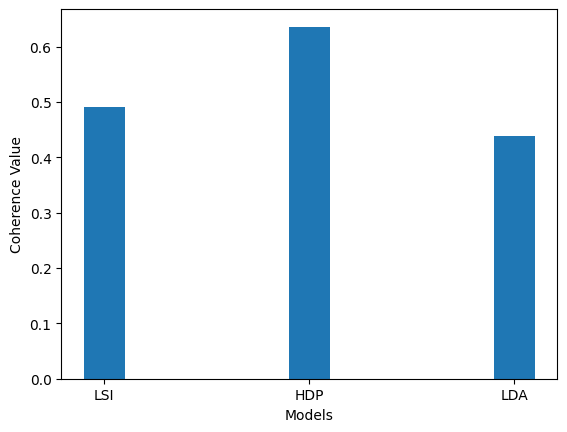

In [ ]:
evaluate_bar_graph([coherence_lsi, coherence_hdp, coherence_lda],
                   ['LSI', 'HDP', 'LDA'])

### Topic Similarities:

We are only focusing on LDA model for now

In [ ]:
# import pickle

# # Load the LDA model from the file
# with open('LDA_Applicationss.pkl', 'rb') as file:
#     lda_model = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentences_df

,overall,reviewerID,asin,Review Title,Review Text Sentence
0,5.0,A34A1UP40713F8,B00009W3I4,great product,like vent well something keep house warmer winter
1,5.0,A34A1UP40713F8,B00009W3I4,great product,sanded painted color house
2,5.0,A34A1UP40713F8,B00009W3I4,great product,look great
3,5.0,A1AHW6I678O6F2,B00009W3PA,five star,good item
4,5.0,A8R48NKTGCJDQ,B00009W3PA,five star,fit new la dryer perfectly
...,...,...,...,...,...
33454,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,making trip ladder ground dry little remove piece
33455,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,little price pay clean vent
33456,5.0,A13391AZAFJ67K,B00570RQ0A,five star,good
33457,5.0,A2V0JXLJ9VCNNX,B00570RQ0A,five star,washer washing


In [ ]:
text_data = sentences_df['Review Text Sentence'].tolist()

In [ ]:
# Tokenize the text
tokenized_text = [simple_preprocess(text) for text in text_data]

In [ ]:
# Assuming lda_model is your loaded LDA model
# Create a new column for each topic in the DataFrame
for i in range(lda_model.num_topics):
    sentences_df[f'Topic_{i}_Similarity'] = 0.0  # Initialize with 0.0

In [ ]:
# Iterate through each document, find its topic distribution, and update the DataFrame
for i, doc in enumerate(tokenized_text):
    bow = id2word.doc2bow(doc)
    topics = lda_model.get_document_topics(bow)

    for topic, similarity in topics:
        sentences_df.at[i, f'Topic_{topic}_Similarity'] = similarity

In [ ]:
sentences_df

,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity
0,5.0,A34A1UP40713F8,B00009W3I4,great product,like vent well something keep house warmer winter,0.000000,0.000000,0.439584,0.000000,0.557166,0.000000,0.0
1,5.0,A34A1UP40713F8,B00009W3I4,great product,sanded painted color house,0.000000,0.978864,0.000000,0.000000,0.000000,0.000000,0.0
2,5.0,A34A1UP40713F8,B00009W3I4,great product,look great,0.000000,0.000000,0.494867,0.000000,0.000000,0.491613,0.0
3,5.0,A1AHW6I678O6F2,B00009W3PA,five star,good item,0.000000,0.000000,0.000000,0.492070,0.000000,0.491347,0.0
4,5.0,A8R48NKTGCJDQ,B00009W3PA,five star,fit new la dryer perfectly,0.222924,0.220822,0.000000,0.000000,0.000000,0.549751,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33454,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,making trip ladder ground dry little remove piece,0.000000,0.000000,0.853272,0.000000,0.000000,0.142808,0.0
33455,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,little price pay clean vent,0.000000,0.000000,0.992523,0.000000,0.000000,0.000000,0.0
33456,5.0,A13391AZAFJ67K,B00570RQ0A,five star,good,0.000000,0.000000,0.010359,0.964367,0.010279,0.000000,0.0
33457,5.0,A2V0JXLJ9VCNNX,B00570RQ0A,five star,washer washing,0.000000,0.981620,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# Iterate through each document, find its topic distribution, and update the DataFrame
for i, doc in enumerate(tokenized_text):
    bow = id2word.doc2bow(doc)
    topics = lda_model.get_document_topics(bow)

    highest_similarity = 0.0
    highest_similarity_topic = -1

    for topic, similarity in topics:
        df.at[i, f'Topic_{topic}_Similarity'] = similarity

        # Check if the current topic has higher similarity than the highest recorded
        if similarity > highest_similarity:
            highest_similarity = similarity
            highest_similarity_topic = topic

    # Store the highest similarity and corresponding topic in new columns
    sentences_df.at[i, 'Highest_Similarity'] = highest_similarity
    sentences_df.at[i, 'Highest_Similarity_Topic'] = highest_similarity_topic

In [ ]:
sentences_df

,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic
0,5.0,A34A1UP40713F8,B00009W3I4,great product,like vent well something keep house warmer winter,0.000000,0.000000,0.439561,0.000000,0.557189,0.000000,0.0,0.557189,4.0
1,5.0,A34A1UP40713F8,B00009W3I4,great product,sanded painted color house,0.000000,0.978864,0.000000,0.000000,0.000000,0.000000,0.0,0.978864,1.0
2,5.0,A34A1UP40713F8,B00009W3I4,great product,look great,0.000000,0.000000,0.494867,0.000000,0.000000,0.491613,0.0,0.494867,2.0
3,5.0,A1AHW6I678O6F2,B00009W3PA,five star,good item,0.000000,0.000000,0.000000,0.492070,0.000000,0.491347,0.0,0.492070,3.0
4,5.0,A8R48NKTGCJDQ,B00009W3PA,five star,fit new la dryer perfectly,0.222929,0.220825,0.000000,0.000000,0.000000,0.549743,0.0,0.549743,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33454,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,making trip ladder ground dry little remove piece,0.000000,0.000000,0.853272,0.000000,0.000000,0.142808,0.0,0.853272,2.0
33455,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,little price pay clean vent,0.000000,0.000000,0.992523,0.000000,0.000000,0.000000,0.0,0.992523,2.0
33456,5.0,A13391AZAFJ67K,B00570RQ0A,five star,good,0.000000,0.000000,0.010359,0.964367,0.010279,0.000000,0.0,0.964367,3.0
33457,5.0,A2V0JXLJ9VCNNX,B00570RQ0A,five star,washer washing,0.000000,0.981620,0.000000,0.000000,0.000000,0.000000,0.0,0.981620,1.0


In [ ]:
# Assuming 'Review Text Sentence' is the column containing the text
sentences_df['Sentiment'] = sentences_df['Review Text Sentence'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment into categories
sentences_df['Sentiment_Category'] = sentences_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [ ]:
sentences_df

,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic,Sentiment,Sentiment_Category
0,5.0,A34A1UP40713F8,B00009W3I4,great product,like vent well something keep house warmer winter,0.000000,0.000000,0.439561,0.000000,0.557189,0.000000,0.0,0.557189,4.0,0.000000,Neutral
1,5.0,A34A1UP40713F8,B00009W3I4,great product,sanded painted color house,0.000000,0.978864,0.000000,0.000000,0.000000,0.000000,0.0,0.978864,1.0,0.000000,Neutral
2,5.0,A34A1UP40713F8,B00009W3I4,great product,look great,0.000000,0.000000,0.494867,0.000000,0.000000,0.491613,0.0,0.494867,2.0,0.800000,Positive
3,5.0,A1AHW6I678O6F2,B00009W3PA,five star,good item,0.000000,0.000000,0.000000,0.492070,0.000000,0.491347,0.0,0.492070,3.0,0.700000,Positive
4,5.0,A8R48NKTGCJDQ,B00009W3PA,five star,fit new la dryer perfectly,0.222929,0.220825,0.000000,0.000000,0.000000,0.549743,0.0,0.549743,5.0,0.512121,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33454,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,making trip ladder ground dry little remove piece,0.000000,0.000000,0.853272,0.000000,0.000000,0.142808,0.0,0.853272,2.0,-0.127083,Negative
33455,5.0,A1IT56MV1C09VS,B0006GVNOA,excellent product showed vent obviously needed...,little price pay clean vent,0.000000,0.000000,0.992523,0.000000,0.000000,0.000000,0.0,0.992523,2.0,0.089583,Positive
33456,5.0,A13391AZAFJ67K,B00570RQ0A,five star,good,0.000000,0.000000,0.010359,0.964367,0.010279,0.000000,0.0,0.964367,3.0,0.700000,Positive
33457,5.0,A2V0JXLJ9VCNNX,B00570RQ0A,five star,washer washing,0.000000,0.981620,0.000000,0.000000,0.000000,0.000000,0.0,0.981620,1.0,0.000000,Neutral


In [ ]:
# #Appliances
# topic_mapping = {
#     0: "Brush Kit and Usage",
#     1: "Product, Washer, and Shipping",
#     2: "Rod, Part, and Drill",
#     3: "Filter and Replacement",
#     4: "Time, Coil, and Brand",
#     5: "Rod, Time, and House"
# }

# # Map the values in the "topic" column
# sentences_df['Highest_Similarity_Topic'] = sentences_df['Highest_Similarity_Topic'].map(topic_mapping)

# #GiftCardss
# topic_mapping = {
#     0: "Gift Card Purchase",
#     1: "Gift Card Review and Balance",
#     2: "Amazon Box and Purchase Experience",
#     3: "Box, Amazon, and Pizza",
#     4: "Amazon, Like, and Number",
#     5: "Pizza, Box, and Coupons",
#     6: "Food, Like, and Perfect",
#     7: "Preferences, Pizza, and Number",
#     8: "Christmas, Tin, and Deal"
# }

# # Map the values in the "topic" column
# sentences_df['Highest_Similarity_Topic'] = sentences_df['Highest_Similarity_Topic'].map(topic_mapping)

# #Magazines
# topic_mapping = {
#     0: "Magazine Content and Reading Experience",
#     1: "Recipes and Cooking",
#     2: "Money, Home, and Information",
#     3: "Reading, Weekly, and Star",
#     4: "Magazine Pages and Content",
#     5: "Esquire Magazine and Content",
#     6: "Money, Esquire, and Property",
#     7: "Magazine Subscription and Advertising",
#     8: "Home Ideas and Dwell Magazine",
#     9: "Automobile and Car Magazines",
# }

# # Map the values in the "topic" column
# sentences_df['Highest_Similarity_Topic'] = sentences_df['Highest_Similarity_Topic'].map(topic_mapping)

# #Fashion
# topic_mapping = {
#     0: "Running Shoes Comfort and Size",
#     1: "Size and Comfort in Footwear",
#     2: "Sneaker Size, Running, and Comfort",
#     3: "Comfort, Lightness, and Foot Pain",
#     4: "Sneaker Characteristics and Feel",
#     5: "Footwear Pair and Training",
#     6: "Feel and Pair",
#     7: "Lightness, Feel, and Running",
#     8: "Running, Toe, and Color",
#     9: "Lightness, Weight, and Training",
# }

# # Map the values in the "topic" column
# sentences_df['Highest_Similarity_Topic'] = sentences_df['Highest_Similarity_Topic'].map(topic_mapping)

# #Beauty
# topic_mapping = {
#     0: "Scented Soap and Hair Care",
#     1: "Product, Scent, and Price",
#     2: "Soap, Bar, and Fragrance",
#     3: "Nail Polish and Soap Review",
#     4: "Hair Product and Toothpaste",
#     5: "Hair Care, Shampoo, and Dryness",
#     6: "Product, Scent, and Brush",
#     7: "Hair, Shampoo, and Scalp",
#     8: "Product, Scent, and Skin"
# }

# # Map the values in the "topic" column
# sentences_df['Highest_Similarity_Topic'] = sentences_df['Highest_Similarity_Topic'].map(topic_mapping)



In [ ]:
zero_records_count = (sentences_df['Highest_Similarity'] == 0.000000).sum()

In [ ]:
zero_records_count

0

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('Appliances_Topic_Sentiments.csv', index=False)


# Unsupervised Sentiment Analysis

In [ ]:
!pip install transformers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version inst

In [ ]:
SentimentClassifier = pipeline("sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

# Calling the function
FunctionBERTSentiment(inpText="Houston we have a problem")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'NEGATIVE'

In [ ]:
df['Sentiment_BERT'] = df['Review Text Sentence'].apply(FunctionBERTSentiment)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic,Sentiment,Sentiment_Category,Sentiment_Vader,Sentiment_BERT
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",POSITIVE
1,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",POSITIVE
2,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",POSITIVE
3,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",POSITIVE
4,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...",POSITIVE


In [ ]:
df['Sentiment'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


POSITIVE    5526
NEGATIVE    2175
Name: Sentiment, dtype: int64

In [ ]:
!pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic,Sentiment,Sentiment_Category
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive
1,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive
2,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive
3,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive
4,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,5.0,A311XHHLM12MUT,B005AGO4LU,love,move effortlessly bend foot,0.043186,0.337973,0.053830,0.050449,0.043260,0.159427,0.311876,0.337973,1.0,0.000000,Neutral
7697,5.0,A311XHHLM12MUT,B005AGO4LU,love,worn multiple activity foot ankle pain,0.028109,0.345953,0.166052,0.033563,0.144471,0.103769,0.178084,0.345953,1.0,0.000000,Neutral
7698,5.0,A311XHHLM12MUT,B005AGO4LU,love,grey color go many outfit mesh breathes perfec...,0.203397,0.202769,0.024439,0.200717,0.020038,0.074927,0.273711,0.273711,6.0,0.233333,Positive
7699,5.0,A311XHHLM12MUT,B005AGO4LU,love,highly recommend,0.043190,0.425596,0.053646,0.050454,0.043264,0.159448,0.224401,0.425596,1.0,0.160000,Positive


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Sentiment_Vader'] = df['Review Text Sentence'].apply(get_sentiment_scores)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic,Sentiment,Sentiment_Category,Sentiment_Vader
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
1,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
2,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
3,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
4,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.8,Positive,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,overall,reviewerID,asin,Review Title,Review Text Sentence,Topic_0_Similarity,Topic_1_Similarity,Topic_2_Similarity,Topic_3_Similarity,Topic_4_Similarity,Topic_5_Similarity,Topic_6_Similarity,Highest_Similarity,Highest_Similarity_Topic,Sentiment,Sentiment_Category,Sentiment_Vader
0,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive,None
1,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive,None
2,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive,None
3,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive,None
4,5.0,ALJ66O1Y6SLHA,B000K2PJ4K,five star,great product price,0.036635,0.058468,0.044722,0.042796,0.036698,0.135243,0.645438,0.645438,6.0,0.800000,Positive,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,5.0,A311XHHLM12MUT,B005AGO4LU,love,move effortlessly bend foot,0.043186,0.337973,0.053830,0.050449,0.043260,0.159427,0.311876,0.337973,1.0,0.000000,Neutral,None
7697,5.0,A311XHHLM12MUT,B005AGO4LU,love,worn multiple activity foot ankle pain,0.028109,0.345953,0.166052,0.033563,0.144471,0.103769,0.178084,0.345953,1.0,0.000000,Neutral,None
7698,5.0,A311XHHLM12MUT,B005AGO4LU,love,grey color go many outfit mesh breathes perfec...,0.203397,0.202769,0.024439,0.200717,0.020038,0.074927,0.273711,0.273711,6.0,0.233333,Positive,None
7699,5.0,A311XHHLM12MUT,B005AGO4LU,love,highly recommend,0.043190,0.425596,0.053646,0.050454,0.043264,0.159448,0.224401,0.425596,1.0,0.160000,Positive,None


In [1]:
jupyter nbconvert --to=script NLP_ProjectCode.ipynb --output NLP_ProjectCode.txt

SyntaxError: invalid syntax (129708340.py, line 1)